In [1]:
import pickle
import numpy as np
import cv2
from sklearn import tree
import matplotlib.pyplot as plt

In [35]:
model = pickle.load(open('model.pickle', 'rb'))
model

C:\Users\Prannaya\.conda\envs\analytics\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


DecisionTreeClassifier(random_state=42)

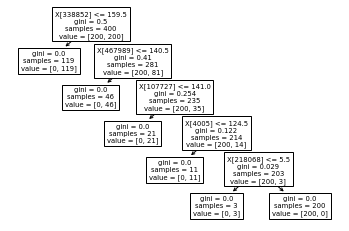

In [36]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(model)
plt.show()

In [37]:
import numpy as np
import cv2

img = cv2.imread("AgentSloth.png")[:,:,::-1].transpose((2, 0, 1))
img.shape

(3, 400, 400)

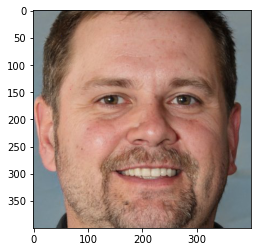

In [38]:
plt.imshow(img.transpose((1,2,0)))

In [39]:
model.predict(img.flatten().reshape(1, -1))

array([2], dtype=int64)

In [40]:
model.feature_importances_.nonzero()

(array([  4005, 107727, 218068, 338852, 467989], dtype=int64),)

In [41]:
im = img.flatten()
#[  4005, 107727, 218068, 338852, 467989]
im[model.feature_importances_.nonzero()[0]]

array([119, 137,   3, 152, 123], dtype=uint8)

In [42]:
#im = img.flatten()
im[338852] = 160 # originally 152 <= 159.5
im[467989] = 141 # originally 123 <= 
im[107727] = 142 # originally 137
im[4005] = 125 # originally 119
im[218068] = 6 # originally 3
img_new = im.reshape((3, 400, 400))#.transpose((1, 2, 0))
img_new.shape

(3, 400, 400)

In [43]:
img_new.flatten()[model.feature_importances_.nonzero()[0]]

array([125, 142,   6, 160, 141], dtype=uint8)

In [44]:
model.predict(img_new.flatten().reshape(1, -1))

array([1], dtype=int64)

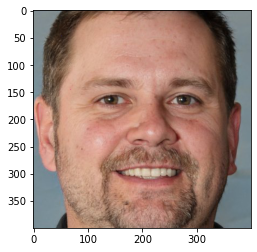

In [45]:
plt.imshow(img_new.transpose((1,2,0)))

In [48]:
cv2.imwrite("AgentSloth2.png", img_new.transpose((1,2,0))[:,:,::-1])

True

In [101]:
cv2.imread("AgentSloth2.png")

array([[[144, 140, 129],
        [144, 140, 129],
        [145, 141, 130],
        ...,
        [141, 139, 128],
        [141, 139, 128],
        [141, 139, 128]],

       [[145, 141, 130],
        [145, 141, 130],
        [145, 141, 130],
        ...,
        [141, 139, 128],
        [141, 139, 128],
        [141, 139, 128]],

       [[145, 141, 130],
        [145, 141, 130],
        [145, 141, 130],
        ...,
        [141, 139, 128],
        [141, 139, 128],
        [141, 139, 128]],

       ...,

       [[149, 140, 120],
        [148, 139, 119],
        [148, 139, 119],
        ...,
        [140, 130, 112],
        [140, 130, 112],
        [140, 130, 112]],

       [[148, 139, 119],
        [148, 139, 119],
        [148, 139, 119],
        ...,
        [140, 130, 112],
        [140, 130, 112],
        [140, 130, 112]],

       [[148, 139, 119],
        [149, 140, 120],
        [149, 140, 120],
        ...,
        [140, 130, 112],
        [140, 130, 112],
        [140, 130, 112]]

In [102]:
(cv2.imread("AgentSloth2.png") != cv2.imread("AgentSloth.png")).nonzero()

(array([ 10,  47, 145, 269, 369], dtype=int64),
 array([  5,  52,   8, 127, 389], dtype=int64),
 array([2, 0, 1, 2, 0], dtype=int64))